In [111]:
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter('ignore')

%matplotlib inline 

import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5 
import plotly
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [33]:
df = pd.read_csv('../../../../data/titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#кол-во столбцов и строк
df.shape

(891, 12)

In [8]:
#какие столбцы имеются
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#информация о типах в каждом столбце
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
#Поменяем тип данных с числового на логический
df['Survived'] = df['Survived'].astype(bool)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
#Сортировка по одном столбцу(Цена)
df.sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,True,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,True,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,True,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,True,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,False,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [37]:
#Сортировка по группе столбцов (пол, класс и цена)
df.sort_values(by=["Pclass", 'Sex', 'Fare'], ascending=[True, True, True]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
796,797,True,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
862,863,True,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
136,137,True,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
11,12,True,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
194,195,True,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C


In [38]:
#Максимальные значения только числовых столбцов(но применять можно к каким угодно)
df[['PassengerId', 'Pclass', 'SibSp', 'Parch', 
     'Fare']].apply(np.max)

PassengerId    891.0000
Pclass           3.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [141]:
#Замена всех значений в столбце с помощью ф-ии map
Change = {3: 'Econom', 2: 'Standart', 1: 'Luxe'}
df['Pclass'] = df['Pclass'].map(Change)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Econom,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Luxe,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Econom,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Luxe,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Econom,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
#'Переоткроем' файл что-бы выкинуть из памяти изменения столбцов
df = pd.read_csv('../../../../data/titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
#шаг с переопределением типов пропустим, ибо пандас считал их правильно
#пропусков нет, поэтому тоже не сбрасываем  :)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


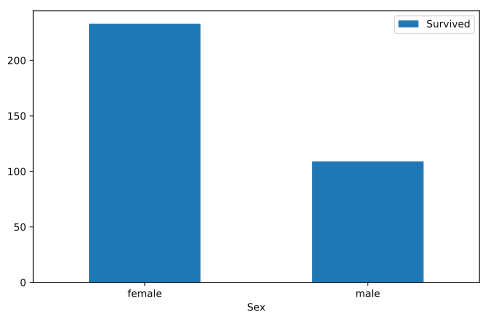

In [101]:
cols=['Survived', 'Sex']
df[cols].groupby('Sex').sum().plot(kind="bar", rot=360)

In [ ]:
cols1 = df[[x for x in df.columns if 'Sex' in x] + ['Sex']]
df[cols1].groupby('Sex').sum().plot(kind="barh", rot=360)

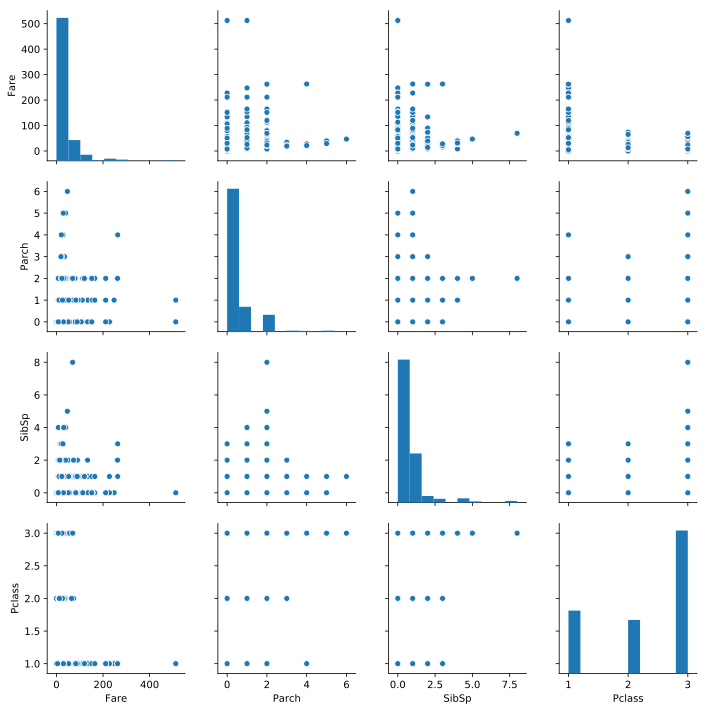

In [65]:
#Знакомимся с seaborn
sns_cols = ['Fare', 'Parch', 'SibSp', 'Pclass']
sns_plot = sns.pairplot(df[sns_cols])


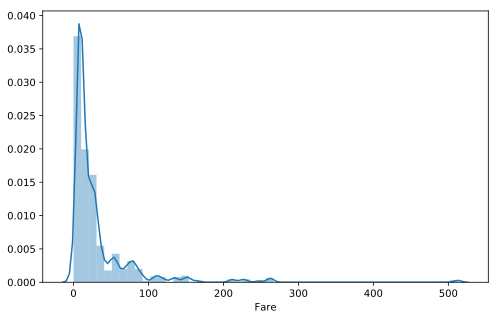

In [92]:
#Распределние отдельного параметра
sns.distplot(df.Fare)


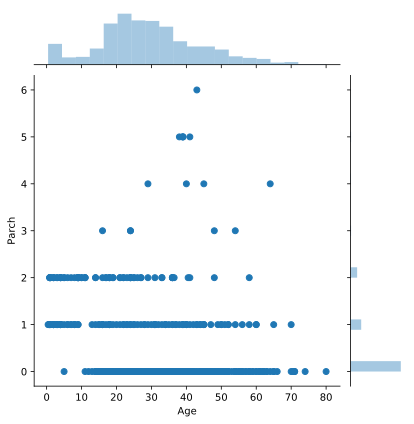

In [71]:
#как связан ваозраст с кол-вом детей/родителей
sns.jointplot(df.Age, df.Parch)

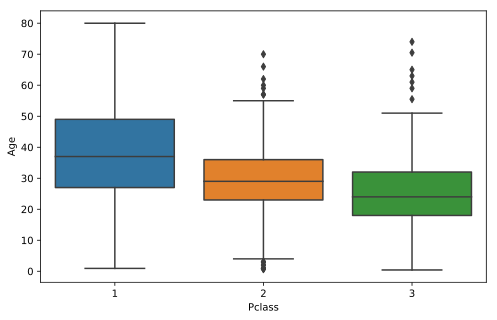

In [78]:
#класс относительно возраста
sns.boxplot(df.Pclass, df.Age)


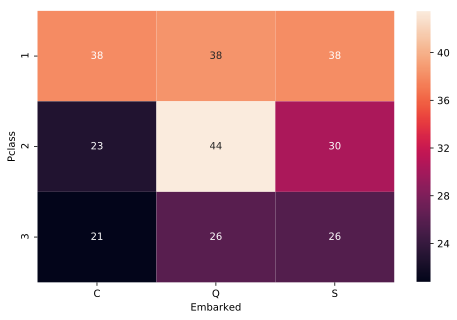

In [84]:
#Средний возраст в зависимости от станции/класса
price = df.pivot_table(
    index='Pclass',
    columns='Embarked',
    values='Age',
    aggfunc=np.mean).fillna(0)

sns.heatmap(price, annot=True)

In [147]:
#знакомство с plotply
q = df.groupby('Pclass')[['Fare']].max().join(
    df.groupby('Pclass')[['Age']].mean()
)


q.columns = ['Pclass_max_fare', 'Pclass_mean_age']


trace0 = go.Scatter(
    x=q.index,
    y=q.Pclass_max_fare,
    name='Max fare'
)


trace1 = go.Scatter(
    x=q.index,
    y=q.Pclass_mean_age,
    name='Average age'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Pclass'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)


'file://C:\\Users\\Алексей\\AI_1\\лабы_решения\\1562_1\\Байдюков А.А\\Lab2\\Pclass_stats.html'

In [149]:
q = df.groupby('Embarked')[['Fare']].max().join(
    df.groupby('Embarked')[['Age']].mean()
)


q.columns = ['Embarked_max_fare', 'Embarked_mean_age']


trace0 = go.Bar(
    x=q.index,
    y=q.Embarked_max_fare,
    name='Max fare'
)


trace1 = go.Bar(
    x=q.index,
    y=q.Embarked_mean_age,
    name='Average age'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Embarked'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [161]:
data = []
for embarked in df.Embarked.unique():
    data.append(
        go.Box(y=df[df.Embarked == embarked].Fare, name=embarked)
    )
iplot(data)